In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Funciones de lectura

In [2]:
def lecturaPgm(file):

    image = Image.open(file)
    pixels = np.array(image.getdata())
    image.close()
    return pixels

#vectorPixel = lecturaPgm('ImagenesCaras/s7/1.pgm') 

def lecturaOutputC(file):
    
    f = open(file, "r")
    stringTc = f.read()
    vectorTc = stringTc.split()
    f.close()
    vectorTc =  [eval(i) for i in vectorTc]
    #array = np.fromstring(' '.join(vectorTc), dtype=int, sep=' ')
    
    return vectorTc

#vector = (lecturaOutputC("outputsmain/example.txt"))

# Funciones de calculo

In [3]:
def distanciaEuclidea(x,y):
    
    if(len(x)!=len(y)):
        print("Different size Vector")
    acum = 0
    for i in range(len(x)):
        acum += (x[i]-y[i])**2
    acum = math.sqrt(acum) 
    return acum

#numpy.linalg.norm(a-b)

def coeficienteCorrelacion(x,y):
    #r(X, Y) = (Σ((xi - mean(X)) * (yi - mean(Y)))) / (sqrt(Σ((xi - mean(X))^2)) * sqrt(Σ((yi - mean(Y))^2)))
    if(len(x)!=len(y)):
        print("Different size Vector")
    promedioX = np.mean(x)
    promedioY = np.mean(y)
    
    num = 0
    div1 = 0
    div2 = 0
    for i in range(len(x)):
        num += (x[i] - promedioX) * (y[i] - promedioY)
        div1 += ((x[i] - promedioX)**2) 
        div2+= ((y[i] - promedioY)**2)
    
    div1 = math.sqrt(div1)
    div2 = math.sqrt(div2)
    
    divTot = div1 * div2
    
    cofCorr = num/divTot
    
    return cofCorr

#numpy.corrcoef

def tc(matAutovec,imagen):
    result = []
    for i in range(0,len(matAutovec)):
        valor = matAutovec[i]@imagen
        result.append(valor[0])
    return result

# Testeo eficacia metodo propio de C++ vs NumPy


In [4]:
X = []
for i in range(2,42):
    directory = 'ImagenesCaras/s'+str(i)
    for h in range(1,11):
        file = directory +'/' + str(h) + '.pgm'
        X.append(lecturaPgm(file))
#X = np.array(X)

In [5]:
#Xcentered = X - X.mean(0)
vec = X[0]
for i in range(1,len(X)):
    vec = vec + X[i]

vec = vec / len(X)

for h in range(0,len(X)):
    X[h] = (X[h] - vec)/ (math.sqrt(len(X)-1))
    
X = np.array(X)

l, V = np.linalg.eigh(np.matmul(X.T,X))

/tmp/ipykernel_2715/2504477353.py:13: RuntimeWarning: invalid value encountered in matmul
  l, V = np.linalg.eigh(np.matmul(X.T,X))


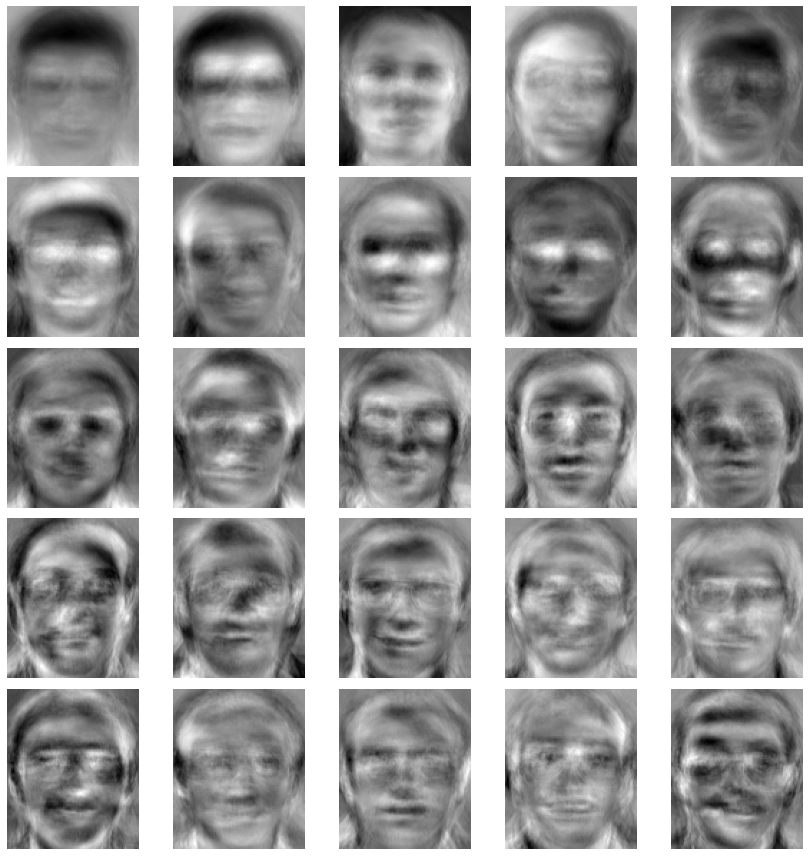

In [6]:
h,w = 112, 92
f, axs = plt.subplots(5,5, figsize=(12,12))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(V[:,-i-1].reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()

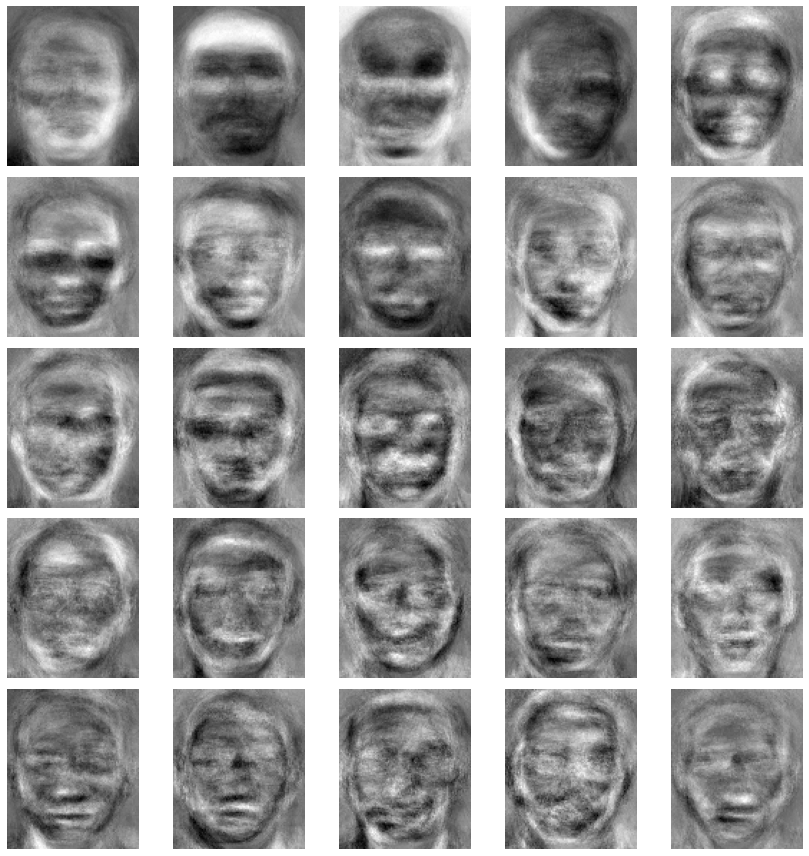

In [7]:
autoVecs = []
h,w = 112, 92
for i in range(0,50):
    vector = lecturaOutputC("outputsmain/graficacion/autovec"+str(i)+".txt")
    autoVecs.append(vector)
autoVecs = np.array(autoVecs)
#autoVecs = autoVecs.T
f, axs = plt.subplots(5,5, figsize=(12,12))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(autoVecs[i].reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()



In [8]:
DistEuclidea=[]
CorrCof = []
cantPcas = [n for n in range (1,50)]
for i in range (len(cantPcas)):
    DistEuclidea.append(np.linalg.norm(V[:,-i-1]-autoVecs[i]))
    CorrCof.append((np.corrcoef(V[:,-i-1],autoVecs[i]))[0, 1])


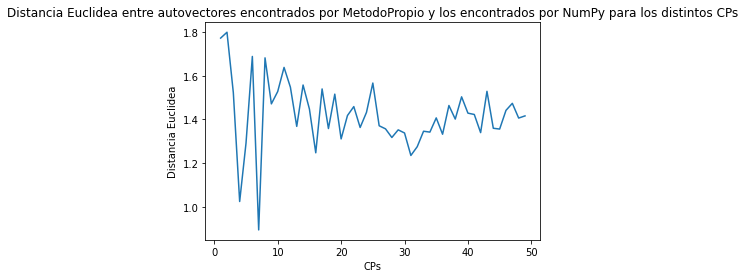

In [9]:
x = cantPcas
y1 = DistEuclidea
# Create a DataFrame combining the data
df1 = pd.DataFrame({'x': x, 'y': y1 })

# Create line plot with hue
sns.lineplot(data=df1, x='x', y='y')

# Add labels and title
plt.xlabel('CPs')
plt.ylabel('Distancia Euclidea')
plt.title('Distancia Euclidea entre autovectores encontrados por MetodoPropio y los encontrados por NumPy para los distintos CPs')

# Display the plot
plt.show()

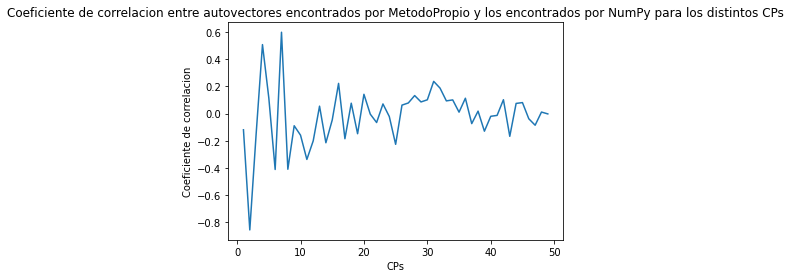

In [10]:
x = cantPcas
y1 = CorrCof
# Create a DataFrame combining the data
df1 = pd.DataFrame({'x': x, 'y': y1 })

# Create line plot with hue
sns.lineplot(data=df1, x='x', y='y')

# Add labels and title
plt.xlabel('CPs')
plt.ylabel('Coeficiente de correlacion')
plt.title('Coeficiente de correlacion entre autovectores encontrados por MetodoPropio y los encontrados por NumPy para los distintos CPs')

# Display the plot
plt.show()

# Comparacion de Tcs entre imagenes de la misma persona y personas diferentes para distintos Componentes Principales


In [11]:
steps = 1
cantPersonas = 40
limite = 10
#cantPcas = [n for n in range (2,limite+1,steps)]
cantPcas = [n for n in range (2,10)]
for n in range(10,60,5):
    cantPcas.append(n)
for n in range(60,160,10):
    cantPcas.append(n)

PromediosMismas = []
PromediosDistintas = []
PromediosMismasCorCof = []
PromedioDistintasCorCof = []
for n in cantPcas:
    valorPromedioMismas = 0
    valorPromedioDistintas = 0
    valorPromedioMismasCorCof = 0
    valorPromedioDistintasCorCof = 0
    autoVecs = []
    Tc = [[] for n in range (1,cantPersonas+2)]
    for i in range(0,n):
        vector = lecturaOutputC("outputsmain/graficacion/autovec"+str(i)+".txt")
        autoVecs.append(vector)
    autoVecs = np.array(autoVecs)
    
    imagenPromedio = [0 for o in range (0,10304)]
    imagenPromedio = np.array(imagenPromedio)
    
    for i in range(2,cantPersonas+2):
        directory = 'ImagenesCaras/s'+str(i)
        for h in range(1,11):
            file = directory +'/' + str(h) + '.pgm'
            imagenPromedio = imagenPromedio + np.array(lecturaPgm(file))
    
    imagenPromedio = imagenPromedio / 400
            

    for i in range(2,cantPersonas+2):
        directory = 'ImagenesCaras/s'+str(i)
        for h in range(1,11):
            X = []
            file = directory +'/' + str(h) + '.pgm'
            X.append(lecturaPgm(file))
            X = np.array(X)
            X = X - np.array([imagenPromedio])
            X = X / math.sqrt(399)
            X = X.T
            Tc[i-2].append(tc(autoVecs,X))
            
    
    
    #Aca sacamos promedio de las distancias para mismas caras
    for i in range(0,cantPersonas):
        divisor = 0
        promediocarpeta = 0
        promediocarpetaCorCof = 0
        for h in range(0,10):
            tc1 = np.array(Tc[i][h])
            for k in range(0,10):
                if k!=h:
                    promediocarpeta += np.linalg.norm(tc1-np.array(Tc[i][k]))
                    result = (np.corrcoef(tc1,np.array(Tc[i][k])))[0, 1]
                    if not np.isnan(result):
                        promediocarpetaCorCof += result
                    divisor+=1
        promediocarpeta = promediocarpeta / divisor
        promediocarpetaCorCof = promediocarpetaCorCof / divisor
        valorPromedioMismasCorCof += promediocarpetaCorCof
        valorPromedioMismas += promediocarpeta
        
    valorPromedioMismasCorCof = valorPromedioMismasCorCof / cantPersonas
    valorPromedioMismas = valorPromedioMismas / cantPersonas
    PromediosMismas.append(valorPromedioMismas)
    PromediosMismasCorCof.append(valorPromedioMismasCorCof)
    
    #Aca sacamos promedio para las distintas
    divisorDistintas=0
    for i in range(0,cantPersonas):
        for h in range(0,10):
            tc1 = np.array(Tc[i][h])
            for k in range(0,cantPersonas):
                if k!=i:
                    for d in range(0,10):
                        valorPromedioDistintas += np.linalg.norm(tc1-np.array(Tc[k][d]))
                        result = (np.corrcoef(tc1,np.array(Tc[k][d])))[0, 1]
                        if not np.isnan(result):
                            valorPromedioDistintasCorCof += result
                        divisorDistintas+=1
    valorPromedioDistintas = valorPromedioDistintas / divisorDistintas
    valorPromedioDistintasCorCof = valorPromedioDistintasCorCof / divisorDistintas
    PromediosDistintas.append(valorPromedioDistintas)
    PromedioDistintasCorCof.append(valorPromedioDistintasCorCof)


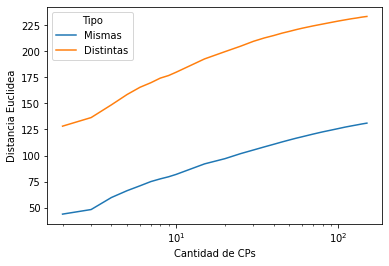

In [12]:
x = cantPcas
y1 = PromediosMismas
y2 = PromediosDistintas 

# Create a DataFrame combining the data
df = pd.DataFrame({'x': x+x, 'y': y1 + y2, 'Tipo': ['Mismas'] * len(y1) + ['Distintas'] * len(y2)})

# Create line plot with hue
sns.lineplot(data=df, x='x', y='y', hue='Tipo')

# Add labels and title
plt.xscale("log")
plt.xlabel('Cantidad de CPs')
plt.ylabel('Distancia Euclidea')
plt.title('')

# Display the plot
plt.show()

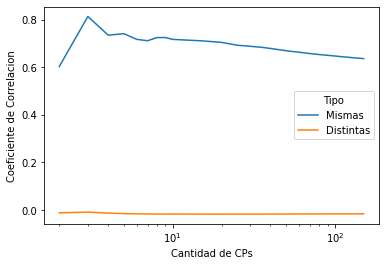

In [13]:
x = cantPcas
y1 = PromediosMismasCorCof
y2 = PromedioDistintasCorCof


# Create a DataFrame combining the data
df1 = pd.DataFrame({'x': x+x, 'y': y1 + y2, 'Tipo': ['Mismas'] * len(y1) + ['Distintas'] * len(y2)})

# Create line plot with hue
sns.lineplot(data=df1, x='x', y='y', hue='Tipo')


# Add labels and title
plt.xscale("log")
plt.xlabel('Cantidad de CPs')
plt.ylabel('Coeficiente de Correlacion')
plt.title('')

# Display the plot
plt.show()

# Distancia Euclidea y Coeficiente de Correlacion entre pixeles

In [14]:
cantPersonas = 40
X = [[] for n in range (cantPersonas)]
for i in range(2,cantPersonas+2):
    directory = 'ImagenesCaras/s'+str(i)
    for h in range(1,11):
        file = directory +'/' + str(h) + '.pgm'
        X[i-2].append(lecturaPgm(file))




DistanciaEuclideaentremismos = 0
DistanciaEuclideaentredistintos = 0
CoeficienteCorrelacionEntreMismos = 0
CoeficienteCorrelacionEntreDistintos = 0


for i in range(0,cantPersonas):
    divisor = 0
    promediocarpeta = 0
    promediocarpetaCorCof = 0
    for h in range(0,10):
        img1 = np.array(X[i][h])
        for k in range(0,10):
            if k!=h:
                promediocarpeta += np.linalg.norm(img1-np.array(X[i][k]))
                promediocarpetaCorCof += (np.corrcoef(img1,np.array(X[i][k])))[0, 1]
                divisor+=1
    promediocarpeta = promediocarpeta / divisor
    promediocarpetaCorCof = promediocarpetaCorCof / divisor
    CoeficienteCorrelacionEntreMismos += promediocarpetaCorCof
    DistanciaEuclideaentremismos += promediocarpeta

CoeficienteCorrelacionEntreMismos = valorPromedioMismasCorCof / cantPersonas
DistanciaEuclideaentremismos = valorPromedioMismas / cantPersonas        
        
       
    
#Aca sacamos promedio para las distintas
divisorDistintas=0
for i in range(0,cantPersonas):
    for h in range(0,10):
        img1 = X[i][h]
        for k in range(0,cantPersonas):
            if k!=i:
                for d in range(0,10):
                    valorPromedioDistintas += np.linalg.norm(img1-np.array(X[k][d]))
                    valorPromedioDistintasCorCof += (np.corrcoef(img1,np.array(X[k][d])))[0, 1]
                    divisorDistintas+=1
valorPromedioDistintas = valorPromedioDistintas / divisorDistintas
valorPromedioDistintasCorCof = valorPromedioDistintasCorCof / divisorDistintas
        
        


In [15]:
print(DistanciaEuclideaentremismos)
print(DistanciaEuclideaentredistintos)
print(CoeficienteCorrelacionEntreMismos)
print(CoeficienteCorrelacionEntreDistintos)

67.88590222010228
0
0.02431419869989706
0


# Tomo el coeficiente de correlacion para establecer un umbral

Las medidas dieron ente 0,99 y 0,98 para correlacion entre mismas imagenes y entre 0,95 y 0,94.
Tomo 0,96 como umbral.
Pero para ver que efectivamente el umbral es optimo hay que hacer k-fold-cross validation.
Se toman como metricas la precision, el recall y el F1-score

Con k = 5 el dataset se divide en particiones de 20 imagenes, 2 imagenes por persona. Usamos 125 Pc ya que no varia mucho con mas por lo observado en el punto anterior.
Seteo el umbral tomando corrcoef de 0,93 hasta 1(inclusive) , sumando de a 0.1.
	Para cada iteracion de K se toma el corrcoef entre los Tc de las 20 imagenes de Test:
		Si eran la misma persona y el corr coef da peor que el umbral lo tomo como un FN
		Si eran la misma persona y el corr coef da mejor o igual que el umbral lo tomo como un TP
		Si eran distinta persona y el corr coef da mejor o igual que el umbral lo tomo como un FP
	calculo precision, recall y Fn para esa iteracion
Hago el promedio de las tres metricas para ese corrcoef

In [14]:
steps = 0.001
Umbral = []
cantPersonas = 40
PrecisionTot = []
RecallTot = []
F1Tot = []
cantPcas = 3
n = 0.9
while n < 1:
    Umbral.append(n)
    Precision = 0
    Recall = 0
    
    for k in range(0,5):
        Truep = 0
        Falsep = 0
        Falsen = 0
        Tc = [[] for n in range (2,cantPersonas+2)]
        
        autoVecs = []
        
        for i in range(0,cantPcas):
            vector = lecturaOutputC("outputsmain/k-fold/k" + str(k)+"/"+"autovec"+str(i)+".txt")
            autoVecs.append(vector)
        autoVecs = np.array(autoVecs)
        
        imagenPromedio = [0 for o in range (0,10304)]
        imagenPromedio = np.array(imagenPromedio)
    
        for i in range(2,cantPersonas+2):
            directory = 'ImagenesCaras/s'+str(i)
            if h!=(k*2)+1 and h!=(k*2)+2:
                for h in range(1,11):
                    file = directory +'/' + str(h) + '.pgm'
                    imagenPromedio = imagenPromedio + np.array(lecturaPgm(file))

        imagenPromedio = imagenPromedio / 380


        for i in range(2,cantPersonas+2):
            directory = 'ImagenesCaras/s'+str(i)
            for h in range(1,11):
                if h==(k*2)+1 or h==(k*2)+2:
                    X = []
                    file = directory +'/' + str(h) + '.pgm'
                    X.append(lecturaPgm(file))
                    X = np.array(X)
                    X = X - np.array([imagenPromedio])
                    X = X / math.sqrt(379)
                    X = X.T
                    Tc[i-2].append(tc(autoVecs,X))

        for i in range(0,len(Tc)):
            for h in range(0,2):
                tc1 = np.array(Tc[i][h])
                #cantDistintasVisitadas = 0
                for d in range(0,cantPersonas):
                    for m in range(0,2):
                        if d == i:
                            resulMismaCorcof = (np.corrcoef(tc1,np.array(Tc[d][m])))[0, 1]
                            if n <= resulMismaCorcof:
                                Truep +=1
                            else:
                                Falsen += 1
                        else:
                            resulDistCorcof = (np.corrcoef(tc1,np.array(Tc[d][m])))[0, 1]
                            if n <= resulDistCorcof:
                                Falsep += 1
                            #cantDistintasVisitadas +=1
        
        Precision += Truep / (Truep + (Falsep/18))
        Recall += Truep / (Truep + Falsen)
        
    n+= steps
    
    Precision = Precision / 5
    Recall = Recall / 5
    F1 = 2 * Precision * Recall/(Precision + Recall)    
    PrecisionTot.append(Precision)
    RecallTot.append(Recall)
    F1Tot.append(F1)


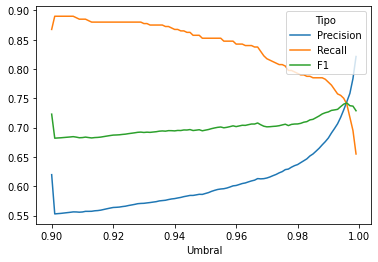

In [15]:
x = Umbral
y1 = PrecisionTot
y2 = RecallTot
y3 = F1Tot

# Create a DataFrame combining the data
df1 = pd.DataFrame({'x': x+x+x, 'y': y1 + y2 + y3, 'Tipo': ['Precision'] * len(y1) + ['Recall'] * len(y2) + ['F1'] * len(y3)})

# Create line plot with hue
sns.lineplot(data=df1, x='x', y='y', hue='Tipo')

# Add labels and title
plt.xlabel('Umbral')
plt.ylabel('')
plt.title('')

# Display the plot
plt.show()